In [ ]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
for i in range(1,101):
    if i%2==1:
        print(i)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99


In [ ]:
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/arXiv_data'

/content/drive/MyDrive/Colab_Notebooks/arXiv_data


In [ ]:
#関係するツールの導入
import os
import numpy as np
import pandas as pd
import collections
import re
from string import digits

import sys
import time

In [ ]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path ='/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_6'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_7'

In [ ]:
#モジュール
module_path = '/content/drive/My Drive/Colab_Notebooks/arXiv_data/module/'
os.chdir(module_path)
import file_processing

In [ ]:
file_names_list = file_processing.read_file_to_list(input_folder_path + "/" + 'k_means_id_list_paper_10.txt')

In [ ]:
file_names_list

['0704.0026',
 '0704.0074',
 '0704.0112',
 '0704.1556',
 '0704.1557',
 '0704.1892',
 '0704.2161',
 '0704.2378',
 '0704.2381',
 '0704.2384',
 '0704.0087',
 '0704.0210',
 '0704.0236',
 '0704.0317',
 '0704.0596',
 '0704.0853',
 '0704.0981',
 '0704.1005',
 '0704.1021',
 '0704.1341',
 '0704.0125',
 '0704.0324',
 '0704.0337',
 '0704.0402',
 '0704.0497',
 '0704.0565',
 '0704.0759',
 '0704.1163',
 '0704.1164',
 '0704.1207']

In [ ]:
len(file_names_list)

30

In [ ]:
df = pd.read_csv(input_folder_path + "/rate_data_k_meansfiles__100_paper_10_100_100.csv")
df = df.drop('Unnamed: 0', axis=1)

##クラスタリングの前準備

In [ ]:
#正規化
def minmax_norm(list_input):
    return (list_input - list_input.min()) / ( list_input.max() - list_input.min())

K-平均法

In [ ]:
#k平均法に必要なパッケージ
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
#クラスタリングの結果からfile名をクラスタごとに分ける
# show_result (str_list,int_array,int) -> str_list_list
def show_result (file, result_k,n):
  result_file = []
  for i in range(n):
    result_file.append([])
  for j in range(len(file)):
    l = result_k[j]
    result_file[l].append(file[j])
  #return print(result_file)
  return result_file

In [ ]:
#傾向となる単語を取りだす
#df: データ k_means_result:k-means法でクラスタリングした結果, n:クラスタリングの個数
def trend (df,k_means_result,n,m,dictionary):
  trend = []
  df['cluster_id']=k_means_result
  for i in range(n):
    trend_n = df[df['cluster_id']==i].mean()
    trend_number = trend_n.drop('cluster_id', axis=0)
    trend_word = trend_number.sort_values(ascending = False)[0:m].index
    trend.append((i,trend_word))
  #return print(trend)
  return trend

階層的クラスタリング

In [ ]:
#階層的クラスタリングに必要なパッケージ
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
    #要素の値が全てゼロの配列を作成する
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

   # Plot the corresponding dendrogram
   #dendrogram(linkage_matrix, **kwargs,labels = file_names_list,leaf_rotation=90 )#, orientation='left')
   dendrogram(linkage_matrix, **kwargs,labels = file_names_list, orientation='left')

In [ ]:
df

,subword,nullity,homt,strut,conv,morita,trip,zigzag,injective,contexts,vent,curvature,hypersurfaces,null,hyperbolic,superpotentials,prime,euler,quadratic,contradiction,semiclassical,vertices,pairings,datum,karch,remark,cmax,riemannian,diagonals,estimates,bilinear,hence,conformally,hypersurface,rule,vizier,triplets,indg,ricci,vectors,...,condition,ﬁnitely,flows,midpoint,math,ﬂows,cells,parallelogram,semi,orthogonality,prove,satisﬁes,ring,hadamard,cannot,moreover,symbol,manifolds,exists,adjacent,possibilities,curl,vector,cauchy,solutions,vertex,homr,entries,uniformly,contradicting,rings,proposition,face,must,neighbourhood,constants,bounded,monomial,incompressible,cluster_id
0,-0.179504,-0.175725,-0.156173,241.497491,-0.333818,-0.403056,214.656997,191.704170,-0.755694,4.933358,107.710949,-1.472129,-0.466850,-0.962180,-0.913253,-0.245797,-0.019493,-0.861553,-1.170018,-0.804186,-0.599479,4.302683,10.121441,-0.316970,-0.159715,-1.022131,-0.160414,-0.816064,53.002107,-1.367683,-0.597422,9.196308,-0.438424,-0.616048,60.536332,83.470071,55.855373,-0.270914,-0.722540,-1.372584,...,-2.073568,-0.957166,-0.296923,17.771060,-0.455134,-0.882470,21.272265,-0.180747,-1.263380,-0.391509,1.640305,-1.566076,-0.944180,-0.401108,-1.122127,-1.303713,-0.874957,-1.176028,-1.693739,-0.705617,0.877631,-0.438934,-2.583747,-0.701163,-2.302359,3.340199,-0.308382,14.832413,-0.984484,-0.298801,-0.929286,-2.428505,0.389058,6.477930,-0.508382,0.897015,-1.071013,-0.550236,-0.318379,2
1,-0.134306,-0.131478,564.713358,-0.145498,-0.249764,543.531739,-0.167135,-0.237686,167.462921,269.404419,-0.117917,-1.101453,-0.349299,-0.719907,-0.683300,-0.183906,-0.755571,-0.644618,-0.875412,-0.601695,-0.448533,-1.049364,151.509523,88.312120,-0.119500,5.321810,-0.120023,-0.610583,-0.154679,-1.023306,42.060725,4.440506,-0.328030,-0.460930,-0.861271,-0.116312,-0.213240,-0.202699,-0.540608,-1.026973,...,5.163924,4.869741,-0.222159,-0.207282,2.468802,-0.660268,-0.707266,-0.135235,71.003780,-0.292929,3.339734,3.950098,21.692967,-0.300111,-1.277810,16.728627,-0.654646,-0.879909,2.104485,-0.527946,-0.488763,-0.328412,-1.933171,-0.524613,-1.722635,-1.208289,-0.230733,0.989204,-0.736595,-0.223564,43.893936,4.791157,-0.616707,-1.708785,-0.380373,-1.003210,-1.249493,-0.411689,-0.238213,1
2,-0.178273,-0.174519,-0.155102,175.855617,-0.331528,-0.400291,144.021296,113.791688,-0.750510,2.299277,89.290039,-1.462029,-0.463647,-0.955579,-0.906988,-0.244111,-1.002918,-0.855643,-1.161991,-0.798669,-0.595366,7.224016,10.194027,-0.314796,-0.158619,-1.006692,-0.159314,-0.810466,72.853404,-1.358300,-0.593324,13.786351,-0.435416,-0.611821,39.099375,32.231453,13.848998,-0.269056,-0.717583,-1.363168,...,-2.053782,-0.950599,-0.294886,3.359415,-0.017250,-0.876416,64.043694,-0.179507,-1.254713,-0.388823,0.129031,-1.555332,-1.567212,-0.398356,0.662901,-0.195846,-0.868954,-1.167960,-1.675734,3.580406,2.434142,-0.435922,-2.176050,-0.696353,-1.848992,0.267165,-0.306267,2.815013,0.045148,-0.296751,-0.922911,-1.582108,0.403093,4.348546,-0.504894,2.423870,-1.658532,-0.546461,-0.316195,2
3,-0.060378,-0.059107,-0.052530,-0.065409,-0.112283,-0.135571,-0.075136,-0.106853,-0.254184,-0.126690,-0.053010,-0.495163,-0.157029,-0.323637,-0.307180,-0.082676,-0.339670,-0.289791,-0.393545,-0.270494,-0.201640,-0.471746,-0.065215,-0.106616,-0.053722,-0.549681,-0.053957,-0.274490,-0.069536,-0.460031,-0.200948,5.721866,-0.147467,-0.207213,-0.387188,-0.052289,-0.095863,-0.091124,-0.243032,-0.461680,...,-0.833313,-0.321951,-0.099872,-0.093185,7.578009,-0.296826,-0.317954,-0.060796,-0.424948,7.462179,2.393979,-0.526762,12.660530,-0.134916,-0.574445,0.990522,-0.294299,-0.395567,0.652985,-0.237340,-0.219725,-0.147639,0.282376,-0.235842,-0.774417,-0.543191,-0.103727,-0.279200,-0.331139,-0.100504,9.286023,-0.816847,-0.277243,-0.768191,-0.170998,-0.450997,-0.561714,-0.185076,-0.107089,0
4,-0.087202,-0.085366,-0.075868,-0.094469,-0.162167,-0.195803,-0.108518,-0.154325,2.357004,-0.182976,-0.076561,-0.715153,-0.226794,-0.467423,-0.443654,-0.1

##データの加工

In [ ]:
#各単語に対して正規化をする．
df_minmax_norm = df.apply(minmax_norm)

##K-means法

In [ ]:
number_cluster = 5

In [ ]:
#k-means
result = KMeans(n_clusters= number_cluster ).fit_predict(df_minmax_norm)

In [ ]:
show_result(file_names_list,result,number_cluster)

[['0704.1556',
  '0704.1557',
  '0704.1892',
  '0704.2161',
  '0704.2378',
  '0704.2381',
  '0704.2384',
  '0704.0087',
  '0704.0317',
  '0704.0596',
  '0704.1005',
  '0704.1341',
  '0704.0337',
  '0704.0402',
  '0704.0565',
  '0704.0759'],
 ['0704.0074'],
 ['0704.0026', '0704.0112'],
 ['0704.0210'],
 ['0704.0236',
  '0704.0853',
  '0704.0981',
  '0704.1021',
  '0704.0125',
  '0704.0324',
  '0704.0497',
  '0704.1163',
  '0704.1164',
  '0704.1207']]

In [ ]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,number_cluster,10,df_minmax_norm.columns)

[(0,
  Index(['subword', 'injective', 'prime', 'homr', 'conformally', 'xmin', 'euler',
         'indg', 'dimk', 'ﬁnitely'],
        dtype='object')),
 (1,
  Index(['homt', 'morita', 'contexts', 'injective', 'pairings', 'subcategories',
         'datum', 'semi', 'rings', 'bilinear'],
        dtype='object')),
 (2,
  Index(['strut', 'trip', 'zigzag', 'vent', 'diagonals', 'vizier', 'trefoil',
         'rule', 'cells', 'indices'],
        dtype='object')),
 (3, Index(['nullity', 'conv', 'superpotentials', 'null', 'cmax', 'vertices',
         'contradiction', 'vectors', 'parallelogram', 'possibilities'],
        dtype='object')),
 (4, Index(['hypersurfaces', 'pulsating', 'curvature', 'karch', 'hyperbolic',
         'estimates', 'semiclassical', 'parabolic', 'thermo', 'hypersurface'],
        dtype='object'))]

In [ ]:
df['dimk']

0      -0.247611
1      -0.185264
2      -0.245912
3      -0.083286
4      -0.120288
5      -0.045543
6      -0.093108
7      38.391649
8     136.111832
9      -0.179423
10     -0.077852
11     -0.325726
12     -0.236922
13     -0.073079
14     -0.140571
15     -0.129247
16     -0.169949
17     -0.134452
18     -0.095739
19     -0.158452
20     -0.184221
21     -0.227863
22     -0.194726
23     -0.127773
24     -0.179803
25     -0.151602
26     -0.142676
27     -0.113214
28     -0.147827
29     -0.166385
Name: dimk, dtype: float64

In [ ]:
df_minmax_norm['homt']

0     0.000087
1     1.000000
2     0.000089
3     0.000271
4     0.000229
5     0.000313
6     0.000260
7     0.000219
8     0.000183
9     0.000163
10    0.000277
11    0.000000
12    0.000099
13    0.000282
14    0.000207
15    0.000219
16    0.000174
17    0.000214
18    0.000257
19    0.000187
20    0.000158
21    0.000109
22    0.000146
23    0.000221
24    0.000163
25    0.000194
26    0.000204
27    0.000237
28    0.000199
29    0.000178
Name: homt, dtype: float64

##階層的クラスタリング

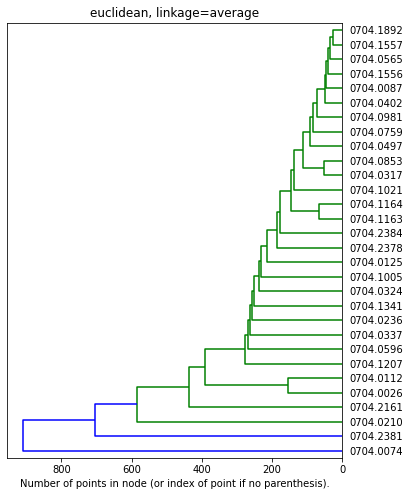

In [ ]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
plt.savefig("dendrogram_z_euclidean_mean.pdf", bbox_inches='tight')
plt.show()

In [ ]:
df['homr']

0      -0.308382
1      -0.230733
2      -0.306267
3      -0.103727
4      -0.149811
5      -0.056720
6     224.101635
7      -0.161655
8      -0.201064
9      -0.223459
10     -0.096959
11     -0.405670
12     -0.295070
13     -0.091015
14     -0.175071
15     -0.160969
16     -0.211660
17     -0.167450
18     -0.119236
19     -0.197341
20     -0.229435
21     -0.283788
22     -0.242518
23     -0.159133
24     -0.223933
25     -0.188810
26     -0.177693
27     -0.141000
28     -0.184109
29     -0.207222
Name: homr, dtype: float64

In [ ]:
df['dimk']

0      -0.247611
1      -0.185264
2      -0.245912
3      -0.083286
4      -0.120288
5      -0.045543
6      -0.093108
7      38.391649
8     136.111832
9      -0.179423
10     -0.077852
11     -0.325726
12     -0.236922
13     -0.073079
14     -0.140571
15     -0.129247
16     -0.169949
17     -0.134452
18     -0.095739
19     -0.158452
20     -0.184221
21     -0.227863
22     -0.194726
23     -0.127773
24     -0.179803
25     -0.151602
26     -0.142676
27     -0.113214
28     -0.147827
29     -0.166385
Name: dimk, dtype: float64